In [1]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from pykrx import stock
import matplotlib.pyplot as plt
import time
plt.rcParams['font.family'] = 'Malgun Gothic'

import kodivstock.divanalyzer as da

ModuleNotFoundError: No module named 'kodivstock.divanalyzer'

In [ ]:
START_YEAR = 2012
END_YEAR = 2022

In [ ]:
df = pd.read_excel('./data/PDF_DATA_20230524.xlsx')
df.head(3)

In [4]:
df_dps = pd.DataFrame(index = range(START_YEAR, END_YEAR+1))
df_dps.head(3)

""
2012
2013
2014


In [5]:
for ticker in df.종목코드:
    ticker = str(ticker).zfill(6)
    dps_list = da.getAnnualDps(START_YEAR, END_YEAR, ticker)
    df_dps[ticker] = dps_list

 185750 cannot read dps in 2013


In [6]:
df_dps

,005490,011780,005940,016360,071050,003540,007070,001800,039490,010130,...,024720,009450,014830,014680,011070,003850,031430,011790,000490,035420
2012,8000,2000,230,700,700,650,400,3000,850,5000,...,105,100,750,500,0,150,600,500,50,616
2013,8000,1500,50,100,200,200,450,3000,350,5000,...,65,100,1000,500,0,150,600,500,50,734
2014,8000,1500,160,650,700,250,600,6000,450,6500,...,100,100,1100,600,250,200,600,550,60,782
2015,8000,800,400,1000,1000,500,850,6000,700,8500,...,125,100,1100,800,350,200,600,750,50,1100
2016,8000,800,400,650,800,550,1100,6000,850,8500,...,155,150,1100,1000,250,200,600,750,40,1131
2017,8000,1000,500,1000,1600,610,600,600,1300,10000,...,185,200,1100,1000,250,160,600,900,60,1446
2018,10000,1350,500,1400,1800,620,650,650,1500,11000,...,195,250,1100,1200,300,60,850,1000,50,314
2019,10000,1500,500,1700,2900,1000,750,650,2000,14000,...,195,300,1200,1500,300,100,1100,1000,60,376
2020,8000,4200,700,2200,3000,1200,900,650,3000,15000,...,205,350,1400,1800,700,100,1100,1000,80,402
2021,17000,10000,1050,3800,6150,1400,1200,650,3500,20000,...,245,450,1700,2100,3000,100,300,1100,80,511


In [7]:
#df_dps.plot()
#plt.show()

In [8]:
dpsExcelFilePath = f'./data/tiger_divgrowth50_dps_data_{START_YEAR}_{END_YEAR}.xlsx'
df_dps.to_excel(dpsExcelFilePath)

""" 7년 배당 성장률 계산하기 """

In [5]:
dpsExcelFilePath = './data/tiger_divgrowth50_dps_data_2012_2021.xlsx'
df_dps = pd.read_excel(dpsExcelFilePath)
df_dps

,Unnamed: 0,005490,011780,005940,016360,071050,003540,007070,001800,039490,...,024720,009450,014830,014680,011070,003850,031430,011790,000490,035420
0,2012,8000,2000,230,700,700,650,400,3000,850,...,105,100,750,500,0,150,600,500,50,616
1,2013,8000,1500,50,100,200,200,450,3000,350,...,65,100,1000,500,0,150,600,500,50,734
2,2014,8000,1500,160,650,700,250,600,6000,450,...,100,100,1100,600,250,200,600,550,60,782
3,2015,8000,800,400,1000,1000,500,850,6000,700,...,125,100,1100,800,350,200,600,750,50,1100
4,2016,8000,800,400,650,800,550,1100,6000,850,...,155,150,1100,1000,250,200,600,750,40,1131
5,2017,8000,1000,500,1000,1600,610,600,600,1300,...,185,200,1100,1000,250,160,600,900,60,1446
6,2018,10000,1350,500,1400,1800,620,650,650,1500,...,195,250,1100,1200,300,60,850,1000,50,314
7,2019,10000,1500,500,1700,2900,1000,750,650,2000,...,195,300,1200,1500,300,100,1100,1000,60,376
8,2020,8000,4200,700,2200,3000,1200,900,650,3000,...,205,350,1400,1800,700,100,1100,1000,80,402
9,2021,17000,10000,1050,3800,6150,1400,1200,650,3500,...,245,450,1700,2100,3000,100,300,1100,80,511


In [19]:
df_dps.index = df_dps.iloc[:,0]
df_dps.index.name = None
df_dps.head(3)

,Unnamed: 0,005490,011780,005940,016360,071050,003540,007070,001800,039490,...,024720,009450,014830,014680,011070,003850,031430,011790,000490,035420
2012,2012,8000,2000,230,700,700,650,400,3000,850,...,105,100,750,500,0,150,600,500,50,616
2013,2013,8000,1500,50,100,200,200,450,3000,350,...,65,100,1000,500,0,150,600,500,50,734
2014,2014,8000,1500,160,650,700,250,600,6000,450,...,100,100,1100,600,250,200,600,550,60,782


In [21]:
df_dps.drop(df_dps.columns[0], axis=1, inplace=True)

In [22]:
df_dps

,005490,011780,005940,016360,071050,003540,007070,001800,039490,010130,...,024720,009450,014830,014680,011070,003850,031430,011790,000490,035420
2012,8000,2000,230,700,700,650,400,3000,850,5000,...,105,100,750,500,0,150,600,500,50,616
2013,8000,1500,50,100,200,200,450,3000,350,5000,...,65,100,1000,500,0,150,600,500,50,734
2014,8000,1500,160,650,700,250,600,6000,450,6500,...,100,100,1100,600,250,200,600,550,60,782
2015,8000,800,400,1000,1000,500,850,6000,700,8500,...,125,100,1100,800,350,200,600,750,50,1100
2016,8000,800,400,650,800,550,1100,6000,850,8500,...,155,150,1100,1000,250,200,600,750,40,1131
2017,8000,1000,500,1000,1600,610,600,600,1300,10000,...,185,200,1100,1000,250,160,600,900,60,1446
2018,10000,1350,500,1400,1800,620,650,650,1500,11000,...,195,250,1100,1200,300,60,850,1000,50,314
2019,10000,1500,500,1700,2900,1000,750,650,2000,14000,...,195,300,1200,1500,300,100,1100,1000,60,376
2020,8000,4200,700,2200,3000,1200,900,650,3000,15000,...,205,350,1400,1800,700,100,1100,1000,80,402
2021,17000,10000,1050,3800,6150,1400,1200,650,3500,20000,...,245,450,1700,2100,3000,100,300,1100,80,511


In [22]:
df_dps_data_last_10 = df_dps.iloc[:,1:]
df_dps_data_last_10

,005490,011780,005940,016360,071050,003540,007070,001800,039490,010130,...,024720,009450,014830,014680,011070,003850,031430,011790,000490,035420
0,8000,2000,230,700,700,650,400,3000,850,5000,...,105,100,750,500,0,150,600,500,50,616
1,8000,1500,50,100,200,200,450,3000,350,5000,...,65,100,1000,500,0,150,600,500,50,734
2,8000,1500,160,650,700,250,600,6000,450,6500,...,100,100,1100,600,250,200,600,550,60,782
3,8000,800,400,1000,1000,500,850,6000,700,8500,...,125,100,1100,800,350,200,600,750,50,1100
4,8000,800,400,650,800,550,1100,6000,850,8500,...,155,150,1100,1000,250,200,600,750,40,1131
5,8000,1000,500,1000,1600,610,600,600,1300,10000,...,185,200,1100,1000,250,160,600,900,60,1446
6,10000,1350,500,1400,1800,620,650,650,1500,11000,...,195,250,1100,1200,300,60,850,1000,50,314
7,10000,1500,500,1700,2900,1000,750,650,2000,14000,...,195,300,1200,1500,300,100,1100,1000,60,376
8,8000,4200,700,2200,3000,1200,900,650,3000,15000,...,205,350,1400,1800,700,100,1100,1000,80,402
9,17000,10000,1050,3800,6150,1400,1200,650,3500,20000,...,245,450,1700,2100,3000,100,300,1100,80,511


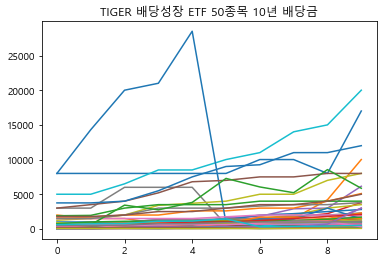

In [27]:

df_dps_data_last_10.plot(legend=None)
plt.title('TIGER 배당성장 ETF 50종목 10년 배당금')
plt.show()

In [49]:
df_dps_data_last_8 = df_dps.iloc[2:,1:]
df_dps_data_last_8

,005490,011780,005940,016360,071050,003540,007070,001800,039490,010130,...,024720,009450,014830,014680,011070,003850,031430,011790,000490,035420
2,8000,1500,160,650,700,250,600,6000,450,6500,...,100,100,1100,600,250,200,600,550,60,782
3,8000,800,400,1000,1000,500,850,6000,700,8500,...,125,100,1100,800,350,200,600,750,50,1100
4,8000,800,400,650,800,550,1100,6000,850,8500,...,155,150,1100,1000,250,200,600,750,40,1131
5,8000,1000,500,1000,1600,610,600,600,1300,10000,...,185,200,1100,1000,250,160,600,900,60,1446
6,10000,1350,500,1400,1800,620,650,650,1500,11000,...,195,250,1100,1200,300,60,850,1000,50,314
7,10000,1500,500,1700,2900,1000,750,650,2000,14000,...,195,300,1200,1500,300,100,1100,1000,60,376
8,8000,4200,700,2200,3000,1200,900,650,3000,15000,...,205,350,1400,1800,700,100,1100,1000,80,402
9,17000,10000,1050,3800,6150,1400,1200,650,3500,20000,...,245,450,1700,2100,3000,100,300,1100,80,511


In [65]:
def getCAGR(capital, final_balance, period):
    cagr = (final_balance/capital) ** (1/period) - 1
    return round(cagr, 2)

In [68]:
cagr_7 = []
for column in df_dps_data_last_8.columns:
    dps = df_dps_data_last_8[column].to_list()
    cagr = getCAGR(dps[0], dps[-1], len(dps)-1)
    print(f'{column}: {cagr}')
    cagr_7.append(cagr)

005490: 0.11
011780: 0.31
005940: 0.31
016360: 0.29
071050: 0.36
003540: 0.28
007070: 0.1
001800: -0.27
039490: 0.34
010130: 0.17
003550: 0.16
018670: 0.14
069260: 0.09
023590: 0.24
000270: 0.17
001680: 0.15
000210: 0.52
001040: 0.13
034730: 0.22
042700: -0.07
005930: -0.31
004000: 0.34
012330: 0.04
084690: 0.05
005440: 0.2
007310: 0.1
139480: 0.04
086280: 0.1
120110: 0.15
003230: 0.39
051900: 0.17
009240: 0.09
036570: 0.08
000020: 0.12
026890: 0.17
097950: 0.14
025540: 0.07
185750: 0.03
069960: 0.07
161890: 0.15
024720: 0.14
009450: 0.24
014830: 0.06
014680: 0.2
011070: 0.43
003850: -0.09
031430: -0.09
011790: 0.1
000490: 0.04
035420: -0.06


In [104]:
df_result = df.iloc[:,:2]
df_result.head(3)

,종목코드,종목명
0,5490,POSCO홀딩스
1,11780,금호석유
2,5940,NH투자증권


In [105]:
df_result['Div Growth 7'] = cagr_7

In [106]:
df_result.head(3)

,종목코드,종목명,Div Growth 7
0,5490,POSCO홀딩스,0.11
1,11780,금호석유,0.31
2,5940,NH투자증권,0.31


In [107]:
df_result.to_excel('./data/tiger_divgrowth50_div_analyze_result.xlsx')

In [1]:
"""
result 파일 분석
"""

'\nresult 파일 분석\n'

In [5]:
df_result = pd.read_excel('./data/tiger_divgrowth50_div_analyze_result.xlsx')

In [10]:
df_result = df_result.iloc[:,1:]

In [12]:
df_result.head(10)

,종목코드,종목명,Div Growth 7
0,5490,POSCO홀딩스,0.11
1,11780,금호석유,0.31
2,5940,NH투자증권,0.31
3,16360,삼성증권,0.29
4,71050,한국금융지주,0.36
5,3540,대신증권,0.28
6,7070,GS리테일,0.10
7,1800,오리온홀딩스,-0.27
8,39490,키움증권,0.34
9,10130,고려아연,0.17


In [14]:
df_result_sorted = df_result.sort_values('Div Growth 7', ascending=False)

In [15]:
df_result_sorted.head(10)

,종목코드,종목명,Div Growth 7
16,210,DL,0.52
44,11070,LG이노텍,0.43
29,3230,삼양식품,0.39
4,71050,한국금융지주,0.36
8,39490,키움증권,0.34
21,4000,롯데정밀화학,0.34
2,5940,NH투자증권,0.31
1,11780,금호석유,0.31
3,16360,삼성증권,0.29
5,3540,대신증권,0.28


In [16]:
df_result_sorted

,종목코드,종목명,Div Growth 7
16,210,DL,0.52
44,11070,LG이노텍,0.43
29,3230,삼양식품,0.39
4,71050,한국금융지주,0.36
8,39490,키움증권,0.34
21,4000,롯데정밀화학,0.34
2,5940,NH투자증권,0.31
1,11780,금호석유,0.31
3,16360,삼성증권,0.29
5,3540,대신증권,0.28


In [14]:
"""
Test
"""

'\nTest\n'

In [40]:
#df_dps = pd.DataFrame(index = range(START_YEAR, END_YEAR+1))
df_dps = pd.DataFrame(index = ('name', range(START_YEAR, END_YEAR+1)))
df_dps.head(3)

""
name
"(2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021)"


In [21]:
df_dps.index.name = 'year'
df_dps

""
year
2012
2013
2014
2015
2016
2017
2018
2019
2020


,종목코드,종목명,수량(주),평가금액(원),비중(%),1주 수익률
0,5490,POSCO홀딩스,84,"27,888,000",5.62,2.00
1,11780,금호석유,164,"26,092,400",5.26,12.04
2,5940,NH투자증권,"2,466","22,810,500",4.60,-2.22
3,16360,삼성증권,679,"22,169,350",4.47,-1.51
4,71050,한국금융지주,364,"21,767,200",4.39,-0.83
5,3540,대신증권,"1,516","19,753,480",3.98,-2.62
6,7070,GS리테일,646,"19,541,500",3.94,1.00
7,1800,오리온홀딩스,"1,208","19,086,400",3.85,-0.06
8,39490,키움증권,170,"17,612,000",3.55,-0.38
9,10130,고려아연,27,"16,443,000",3.31,10.53
